In [390]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, gamma
from scipy.stats import multivariate_normal
import math

### Activity 1 : Central Limit Theorem

In [150]:
N = [1,2,10]  #Number of random varibles to sum over
niter = 10000  ## Number of iterations of the mean value
output = {}
for n in N:
    means = np.zeros(niter)
    for i in range(niter):
        X = np.random.uniform(0,1,n)
        X_mean = np.mean(X)
        means[i] = X_mean
    output[str(n)] = means
        

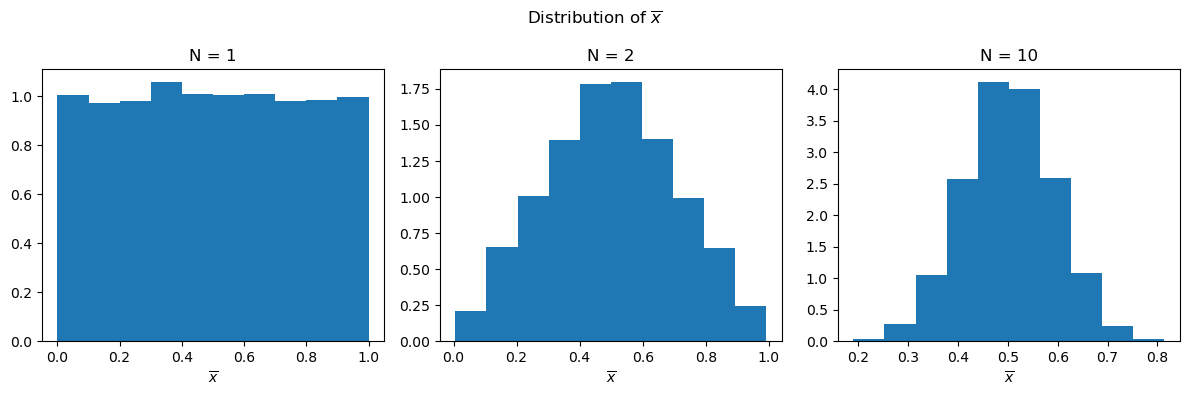

In [152]:
fig, axes = plt.subplots(1,len(N), figsize=(12,4))
for i, n in enumerate(output.keys()):
    axes[i].hist(output[n], density = True)
    axes[i].set_title('N = '+ str(n))
    axes[i].set_xlabel(r'$\overline{x} $')
fig.suptitle(r'Distribution of $\overline{x} $')

fig.tight_layout()
plt.savefig('act1_fig1.png', dpi= 300)

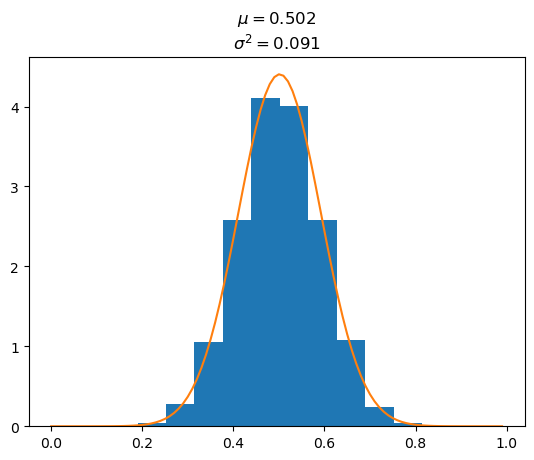

In [154]:
'''
Obtaining a Gaussian fit for the N=10 distribution
'''
(mu, sigma) = norm.fit(output['10'])
plt.hist(output['10'], density=True)
t = np.arange(0,1, 0.01)
fit_plot = plt.plot(t, norm.pdf(t, mu, sigma),label='Gaussian Fit')
plt.title(r'$\mu =$' + str(round(mu,3)) + '\n'
          + r'$\sigma^{2} = $' + str(round(sigma,3)))
plt.savefig('act1_fig2.png', dpi=300)

### ACTIVITY 2 : 2D Gaussian distribution

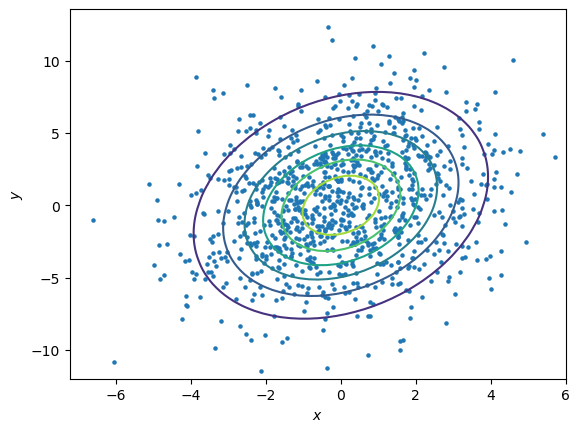

In [157]:
'''
Draw samples from a gaussian distribution
'''
nsamples = 1000
mean = [0,0]
covariance = [[4,2],[2,16]]
x_samples,y_samples = np.random.multivariate_normal(mean, covariance, nsamples).T

gaussian = multivariate_normal(mean = mean, cov=covariance)
## For countours
x_steps = np.linspace(-6, +6, 50)
y_steps = np.linspace(-12, 12, 100)
X,Y = np.meshgrid(x_steps,y_steps)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = gaussian.pdf([X[i,j], Y[i,j]])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.contour(X,Y,Z)
plt.scatter(x_samples, y_samples, s = 5)
plt.savefig('act2.png', dpi=300)

### ACTIVITY 3 : SEQUENTIAL ESTIMATOR

In [160]:
class SeqEstimator():
    def __init__(self,mean,sigma,nsamples):
        self.mean = mean
        self.sigma = sigma
        self.nsamples = nsamples
        self.samples = np.random.normal(loc=self.mean,
                                        scale=self.sigma,
                                        size=self.nsamples)
    
    def seq_ml_means(self):
        _mean = np.zeros(self.nsamples)
        for i in range(self.nsamples):
            _mean[i] = np.mean(self.samples[:i+1])
        return _mean
    
    def ml_mean(self):
        return np.mean(self.samples)
    
    def ml_sigma(self):
        ml_mean_vec = np.resize(self.ml_mean(), self.nsamples)
        ml_var = np.sum((self.samples - ml_mean_vec)**2)/self.nsamples
        return np.sqrt(ml_var)
    
    def unbiased_ml_sigma(self):
        ml_mean_vec = np.resize(self.ml_mean(), self.nsamples)
        ml_var = np.sum((self.samples - ml_mean_vec)**2)/(self.nsamples-1)
        return np.sqrt(ml_var)


In [162]:
mu_ml_realisations = {} #np.zeros((3,100))
sigma_ml_realisations = {} #np.zeros((3,100))
sigma_tilde_realisations = {} #np.zeros((3,100))
for i,n in enumerate([10,100,1000]):
    mu_ml_array = np.zeros(100)
    sigma_ml_array = np.zeros(100)
    sigma_tilde_array = np.zeros(100)
    for j in range(100):
        instance = SeqEstimator(0,0.3,n)
        mu_ml_array[j] = instance.ml_mean()
        sigma_ml_array[j] = instance.ml_sigma()
        sigma_tilde_array[j] = instance.unbiased_ml_sigma()
    mu_ml_realisations[str(n)] = mu_ml_array
    sigma_ml_realisations[str(n)] = sigma_ml_array
    sigma_tilde_realisations[str(n)] = sigma_tilde_array


    


Plot the realisations of the mean_ml

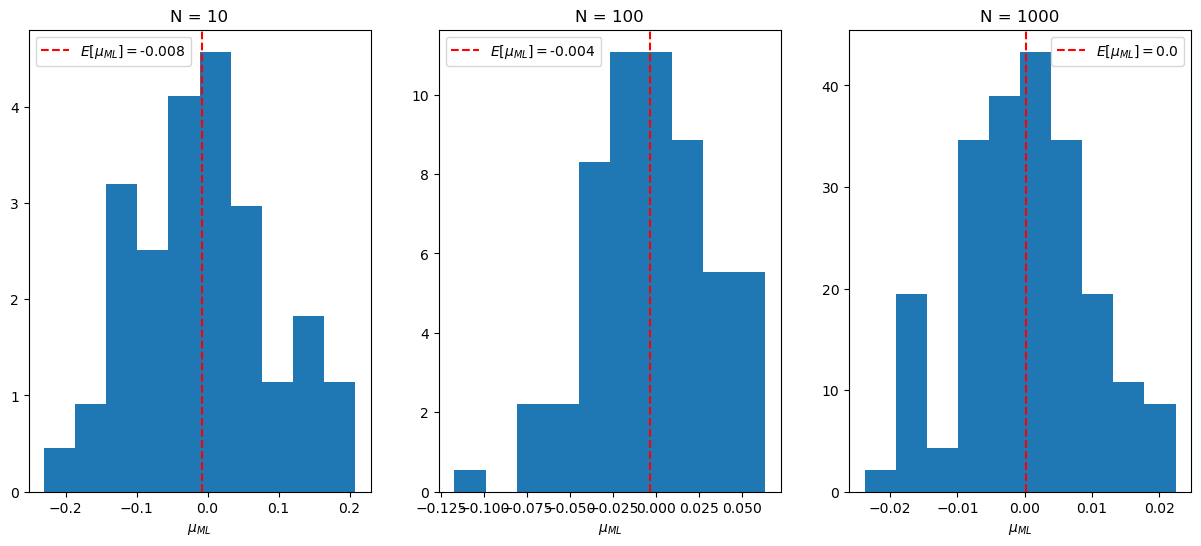

In [165]:
fig_mu, axs_mu = plt.subplots(1,3, figsize = (15,6))
for i,n in enumerate([10,100,1000]):
    mu_samples = mu_ml_realisations[str(n)]
    axs_mu[i].hist(mu_samples,density=True)
    axs_mu[i].axvline(mu_samples.mean(),
                        color='r',
                        linestyle='dashed',
                        label=r'$E[\mu_{ML}]=$'+str(round(mu_samples.mean(),3)))
    axs_mu[i].set_title('N = '+ str(n))
    axs_mu[i].set_xlabel(r'$\mu_{ML}$')
    axs_mu[i].legend()
#plt.savefig('act3_fig2.png', dpi = 300)

Plot the realisations of sigma and sigma_tilde

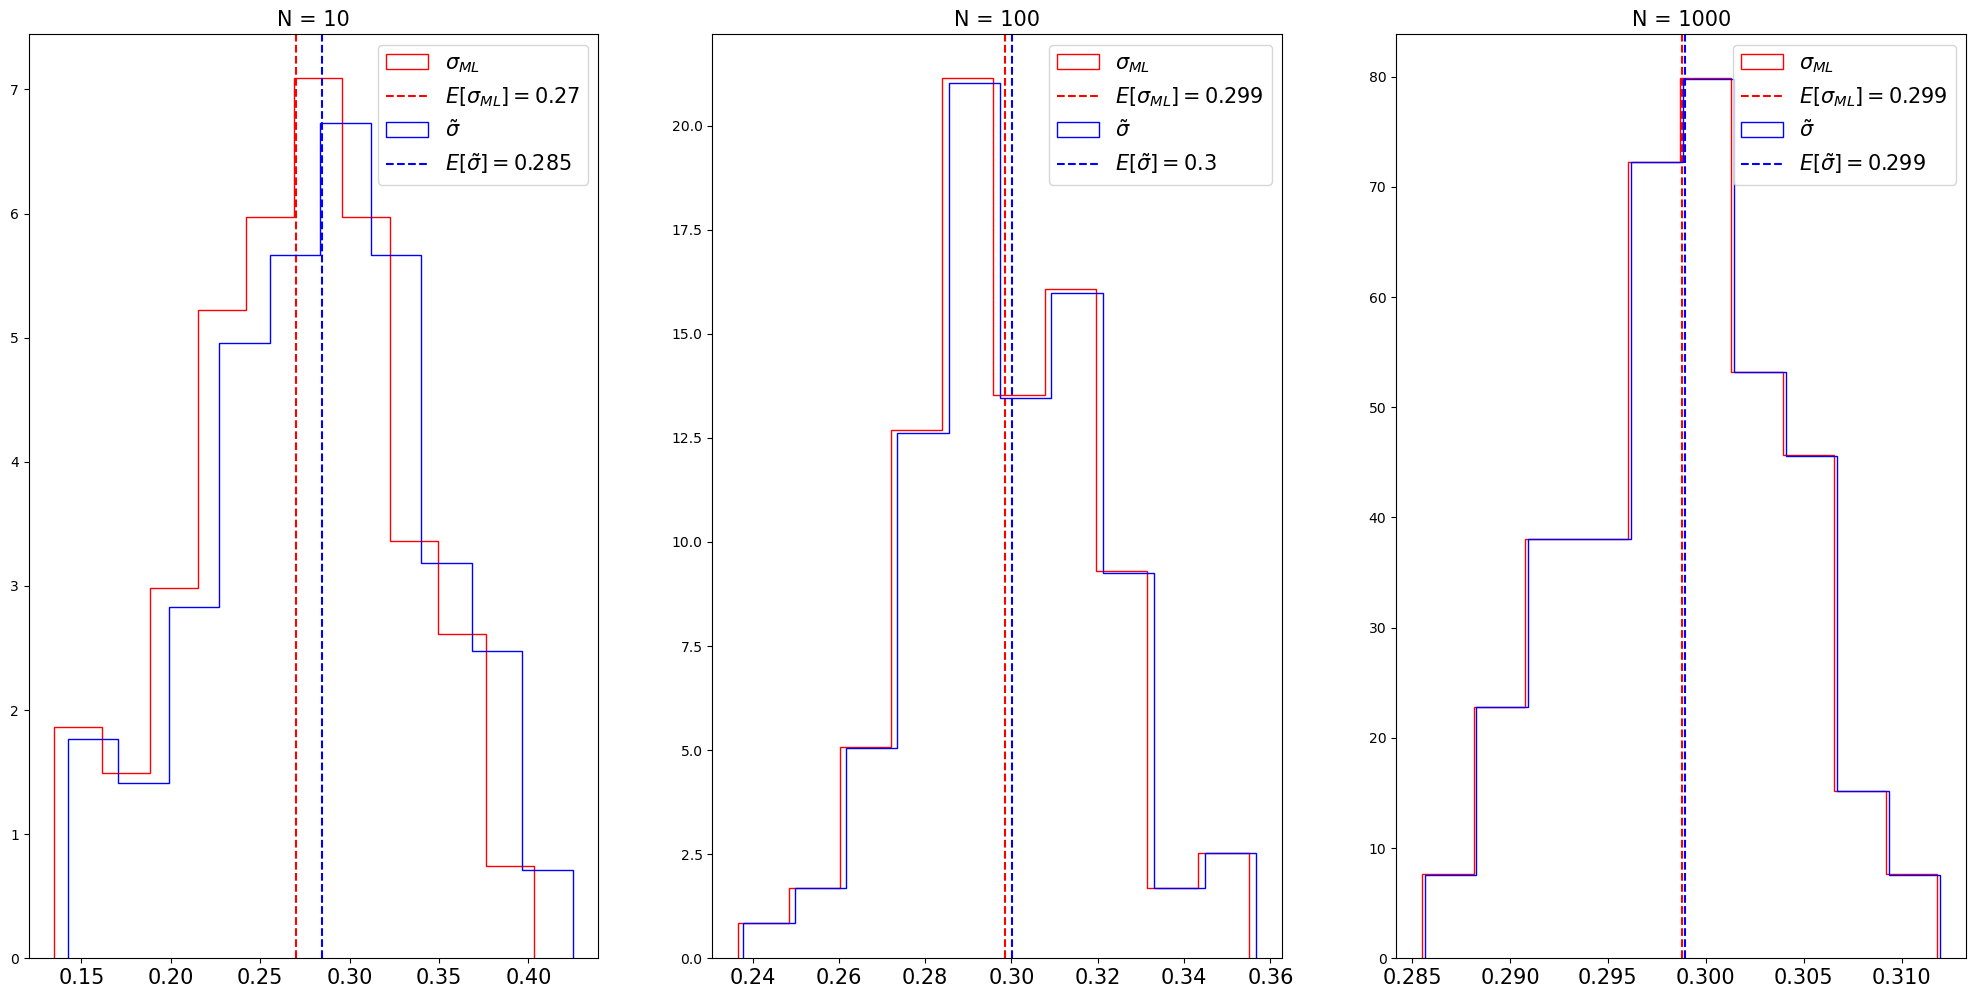

In [168]:
fig_sigma, axs_sigma = plt.subplots(1,3,figsize=(25,12))
for i,n in enumerate([10,100,1000]):
    sigma_samples = sigma_ml_realisations[str(n)]
    sigma_tilde_samples = sigma_tilde_realisations[str(n)]
    axs_sigma[i].hist(sigma_samples,density=True,histtype='step',
                      label = r'$\sigma_{ML}$',color='r')
    axs_sigma[i].axvline(sigma_samples.mean(),
                        color='r',
                        linestyle='dashed',
                        label=r'$E[\sigma_{ML}]=$'+str(round(sigma_samples.mean(),3)))
    axs_sigma[i].hist(sigma_tilde_samples,density=True,histtype='step',
                   label=r'$\tilde \sigma$',color='b')
    axs_sigma[i].axvline(sigma_tilde_samples.mean(),
                        color='b',
                        linestyle='dashed',
                        label=r'$E[\tilde \sigma]=$'+str(round(sigma_tilde_samples.mean(),3)))
    axs_sigma[i].set_title('N = '+ str(n), fontsize=15)
    #axs_sigma[i].set_xlabel(r'$\mu_{ML}$')
    axs_sigma[i].legend(fontsize=15)
    axs_sigma[i].xaxis.set_tick_params(labelsize=15)
    plt.savefig('act3_fig3.png',dpi=300)


### ACTIVITY 4

Results for N = 3:
  MLE Mean (mu_MLE): 5.670758926627161
  Bayesian Mean (mu_posterior): 5.003610817612201
  Bayesian Variance (sigma^2_posterior): 1.1764705882352942
  Bayesian Alpha (for sigma^2 posterior): 3.5
  Bayesian Beta (for sigma^2 posterior): 3.3706848183340696
  a/b (1/sigma_2_posterior): 1.0383646613775783

Results for N = 10:
  MLE Mean (mu_MLE): 5.557457510446027
  Bayesian Mean (mu_posterior): 5.343709144659641
  Bayesian Variance (sigma^2_posterior): 0.3846153846153846
  Bayesian Alpha (for sigma^2 posterior): 7.0
  Bayesian Beta (for sigma^2 posterior): 15.034241086730837
  a/b (1/sigma_2_posterior): 0.4656038146267438

Results for N = 50:
  MLE Mean (mu_MLE): 4.406244995403383
  Bayesian Mean (mu_posterior): 4.371274797027166
  Bayesian Variance (sigma^2_posterior): 0.07936507936507936
  Bayesian Alpha (for sigma^2 posterior): 27.0
  Bayesian Beta (for sigma^2 posterior): 90.83980515911564
  a/b (1/sigma_2_posterior): 0.2972265291928644

Results for N = 200:
  MLE M

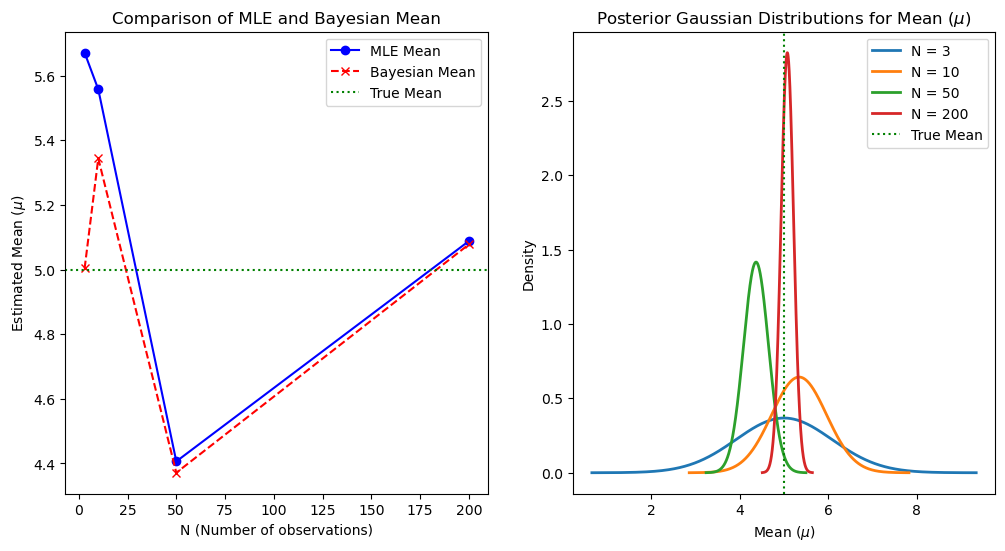

<Figure size 640x480 with 0 Axes>

In [404]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data 
def generate_data(mu_true, sigma_true, N):
    return np.random.normal(mu_true, sigma_true, N)

# MLE Estimation for the Mean
def mle_mean(data):
    return np.mean(data)

# Bayesian Inference for Mean using conjugate prior (Normal prior for mean)
#tau: prior sigma
def bayesian_inference_mu(data, mu_0, tau_2, sigma_2):
    N = len(data)
    x_bar = np.mean(data)  #Sample mean: same as mle mean
    
    # Posterior Mean (mu_posterior)
    #mu_posterior = mu_0*(sigma_2/(N*tau_2 + sigma_2))+ x_bar*((N*tau_2)/(sigma_2))
    mu_posterior = (mu_0 / tau_2 + N * x_bar / sigma_2) / (1 / tau_2 + N / sigma_2)   
    
    # Posterior Variance (sigma_posterior^2)
    #sigma_2_posterior = 1 / (1 / tau_2 + N / sigma_2)
    
    return mu_posterior

# Bayesian Inference for Variance (Inverse Gamma prior for variance)
def bayesian_inference_sigma2(data, mu, alpha_0, beta_0):
    N = len(data)
    # Calculate the sum of squared differences from the mean
    sse = np.sum((data - mu) ** 2)
    
    # Posterior parameters
    alpha_posterior = alpha_0 + N / 2
    beta_posterior = beta_0 + sse / 2

    # Posterior Variance (sigma_posterior^2)
    sigma_2_posterior = 1 / (1 / tau_2 + N / sigma_2)
    
    return alpha_posterior, beta_posterior, sigma_2_posterior

# Simulation parameters
mu_true = 5.0        # True mean
sigma_true = 2.0     # True standard deviation (known)
N_values = [3, 10, 50, 200]  # Different sizes of data
mu_0 = 0.0          # Prior mean for the Bayesian inference
tau_2 = 10.0        # Prior variance for the Bayesian inference
sigma_2 = sigma_true**2  # Known variance: squaring std deviation: don't get confused

# Gamma prior parameters for Bayesian variance estimation
alpha_0 = 2.0
beta_0 = 2.0

# Store results for comparison
mle_results = []
bayesian_mu_results = []
bayesian_sigma2_results = []

# Bayesian inference for diff values of N
for N in N_values:
    # Generate data for the given N
    data = generate_data(mu_true, sigma_true, N)
    
    # Maximum Likelihood Estimation for mu
    mle_mu = mle_mean(data)
    
    # Bayesian Inference for mu
    mu_posterior = bayesian_inference_mu(data, mu_0, tau_2, sigma_2)
    
    # Bayesian Inference for sigma^2
    alpha_posterior, beta_posterior, sigma_2_posterior = bayesian_inference_sigma2(data, mu_true, alpha_0, beta_0)
    
    # Store results
    mle_results.append(mle_mu)
    bayesian_mu_results.append(mu_posterior)
    bayesian_sigma2_results.append((alpha_posterior, beta_posterior, sigma_2_posterior))
    aoverb = alpha_posterior/beta_posterior
    
    # Print results for each N
    print(f"Results for N = {N}:")
    print(f"  MLE Mean (mu_MLE): {mle_mu}")
    print(f"  Bayesian Mean (mu_posterior): {mu_posterior}")
    print(f"  Bayesian Variance (sigma^2_posterior): {sigma_2_posterior}")
    print(f"  Bayesian Alpha (for sigma^2 posterior): {alpha_posterior}")
    print(f"  Bayesian Beta (for sigma^2 posterior): {beta_posterior}")
    print(f"  a/b (1/sigma_2_posterior): {aoverb}\n")

    

# Plotting results
plt.figure(figsize=(12, 6))

# Plot comparison of MLE and Bayesian mean estimates
plt.subplot(1, 2, 1)
plt.plot(N_values, mle_results, label="MLE Mean", marker='o', linestyle='-', color='b')
plt.plot(N_values, bayesian_mu_results, label="Bayesian Mean", marker='x', linestyle='--', color='r')
plt.axhline(mu_true, color='g', linestyle=':', label="True Mean")
plt.xlabel('N (Number of observations)')
plt.ylabel(r'Estimated Mean ($\mu$)')
plt.title('Comparison of MLE and Bayesian Mean')
plt.legend()

# Plot Gaussian distributions for different posterior means
plt.subplot(1, 2, 2)
for i, N in enumerate(N_values):
    mu_posterior = bayesian_mu_results[i]
    sigma_2_posterior = bayesian_sigma2_results[i][2]  # Posterior variance for mu
    
    # Create a Gaussian distribution using the posterior mean and variance
    x = np.linspace(mu_posterior - 4 * np.sqrt(sigma_2_posterior), 
                    mu_posterior + 4 * np.sqrt(sigma_2_posterior), 1000)
    #x = np.linspace(-30,30,1000)
    y = norm.pdf(x, mu_posterior, np.sqrt(sigma_2_posterior))
    
    plt.plot(x, y, label=f'N = {N}', linestyle='-', linewidth=2)

plt.axvline(mu_true, color='g', linestyle=':', label="True Mean")
plt.xlabel(r'Mean ($\mu$)')
plt.ylabel('Density')
plt.title(r'Posterior Gaussian Distributions for Mean ($\mu$)')
plt.legend()
plt.savefig('act4_1.png')
plt.show()

plt.tight_layout()
plt.show()


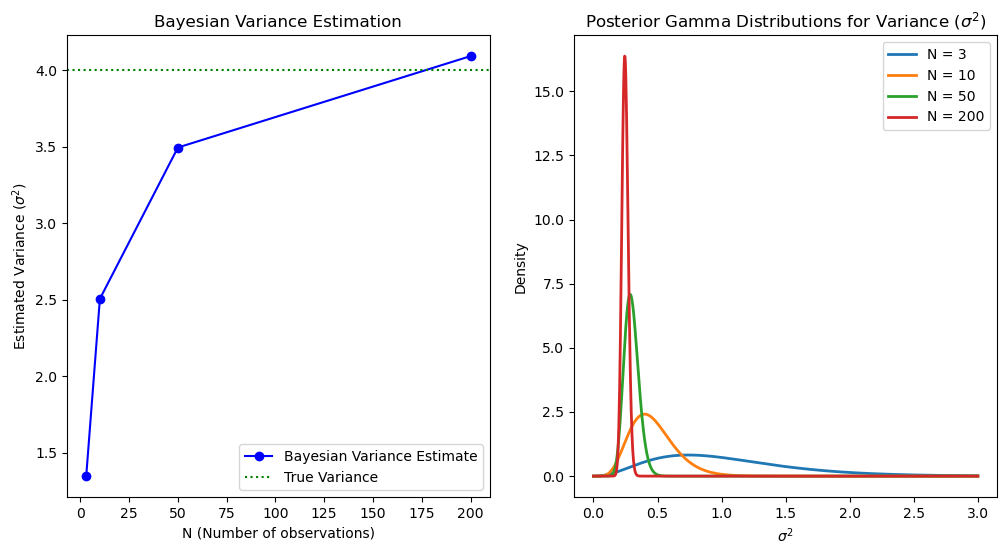

<Figure size 640x480 with 0 Axes>

In [406]:
# Plotting results
plt.figure(figsize=(12, 6))

# Plot comparison of Bayesian variance estimates
plt.subplot(1, 2, 1)
plt.plot(N_values, [b[1] / (b[0] - 1) for b in bayesian_sigma2_results], label="Bayesian Variance Estimate", marker='o', linestyle='-', color='b')
plt.axhline(sigma_true**2, color='g', linestyle=':', label="True Variance")
plt.xlabel('N (Number of observations)')
plt.ylabel(r'Estimated Variance ($\sigma^2$)')
plt.title('Bayesian Variance Estimation')
plt.legend()

# Plot Gaussian distributions for different posterior variances
plt.subplot(1, 2, 2)
for i, N in enumerate(N_values):
    #mu_posterior = bayesian_mu_results[i]
    alpha_posterior = bayesian_sigma2_results[i][0]
    beta_posterior = bayesian_sigma2_results[i][1]
    sigma_2_posterior = bayesian_sigma2_results[i][2]  # Posterior variance for mu
    
    # Create a Gaussian distribution using the posterior mean and variance
    x = np.linspace(0, 3, 1000) 
    #x_mult = x*(beta_posterior**alpha_posterior)
    y = gamma.pdf(x, alpha_posterior, scale=1/beta_posterior)
    
    plt.plot(x, y, label=f'N = {N}', linestyle='-', linewidth=2)

#plt.axvline(sigma_2, color='g', linestyle=':', label="True Std Deviation")
plt.xlabel(r'$\sigma^2$')
plt.ylabel('Density')
plt.title(r'Posterior Gamma Distributions for Variance ($\sigma^2$)')
plt.legend()
plt.savefig('act4_2.png')
plt.show()

plt.tight_layout(pad=100)
plt.show()